### HW04 Static Analysis

Since we cannot share real malware binary with you. We give you the pefile analysis result (by calling pefile_dump() ) and save the result in a dictionary. You have to practice writing a parser before analyzing the given pefile dump file.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

### Download data


In [2]:
# Here is the dump dictionary.
!wget https://drive.google.com/uc?id=1BTr1IDPhRF9WnFjXFwJWiqJ31qa-EWL9 -O pef_dumpdict_40.pickle

--2020-04-12 20:12:32--  https://drive.google.com/uc?id=1BTr1IDPhRF9WnFjXFwJWiqJ31qa-EWL9
Resolving drive.google.com (drive.google.com)... 74.125.200.139, 74.125.200.113, 74.125.200.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.200.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jps8jc87ll11arnmja6dbt9doabthgg2/1586722350000/17174434063503717705/*/1BTr1IDPhRF9WnFjXFwJWiqJ31qa-EWL9 [following]
--2020-04-12 20:12:32--  https://doc-08-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jps8jc87ll11arnmja6dbt9doabthgg2/1586722350000/17174434063503717705/*/1BTr1IDPhRF9WnFjXFwJWiqJ31qa-EWL9
Resolving doc-08-38-docs.googleusercontent.com (doc-08-38-docs.googleusercontent.com)... 74.125.24.132, 2404:6800:4003:c03::84
Connecting to doc-08-38-docs.googleusercontent.com (doc-08-38-docs.googleusercontent.com)|74.125.

In [3]:
# The size should be 414677 bytes.
!ls -al

total 1496
drwxr-xr-x 1 root root    4096 Apr 12 16:08 .
drwxr-xr-x 1 root root    4096 Apr 12 16:06 ..
drwxr-xr-x 1 root root    4096 Apr  9 16:10 .config
-rw-r--r-- 1 root root  414677 Apr 12 20:12 pef_dumpdict_40.pickle
-rw-r--r-- 1 root root 1096080 Sep 22  2019 putty32.exe
drwxr-xr-x 1 root root    4096 Apr  3 16:24 sample_data


In [0]:
# It is stored in a pickle file.
# You can retrive it by using the following code.

import pickle
import os
import json  

with open("/content/pef_dumpdict_40.pickle", 'rb') as fd:
  pef_dumpdicts = pickle.load(fd)

In [0]:
import json
with open("/content/pef_dumpdict_40.pickle", 'rb') as fd:
  pef_dumpdicts = pickle.load(fd)


In [0]:
def default(self, obj):
  if isinstance(obj, bytes):
    return obj.decode()
  return json.JSONEncoder.default(self, obj)

### A dump file example


In [7]:
# Get a 32-bit putty pe file
!wget https://the.earth.li/~sgtatham/putty/latest/w32/putty.exe -O putty32.exe

--2020-04-12 20:12:44--  https://the.earth.li/~sgtatham/putty/latest/w32/putty.exe
Resolving the.earth.li (the.earth.li)... 93.93.131.124, 2a00:1098:86:4d:c0ff:ee:15:900d
Connecting to the.earth.li (the.earth.li)|93.93.131.124|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://the.earth.li/~sgtatham/putty/0.73/w32/putty.exe [following]
--2020-04-12 20:12:45--  https://the.earth.li/~sgtatham/putty/0.73/w32/putty.exe
Reusing existing connection to the.earth.li:443.
HTTP request sent, awaiting response... 200 OK
Length: 1096080 (1.0M) [application/x-msdos-program]
Saving to: ‘putty32.exe’

putty32.exe         100%[===================>]   1.04M   627KB/s    in 1.7s    

2020-04-12 20:12:47 (627 KB/s) - ‘putty32.exe’ saved [1096080/1096080]



In [8]:
!pip install pefile

In [0]:
import pefile

pef = pefile.PE("/content/putty32.exe", True)
dump_dict = pef.dump_dict()

In [10]:
# a pefile dump dictionary has some information
# they are stored in different "keys"
print(dump_dict.keys())

dict_keys(['DOS_HEADER', 'NT_HEADERS', 'FILE_HEADER', 'Flags', 'OPTIONAL_HEADER', 'DllCharacteristics', 'PE Sections', 'Directories', 'Version Information', 'Imported symbols', 'Resource directory', 'LOAD_CONFIG', 'Base relocations'])


In [11]:
# show one of the data in 'DOS_HEADER' key
# and it looks like a python dictionary
# you can put this data in a json or a dictionaary structure for further analysis
print(dump_dict['DOS_HEADER'])

{'Structure': 'IMAGE_DOS_HEADER', 'e_magic': {'FileOffset': 0, 'Offset': 0, 'Value': 23117}, 'e_cblp': {'FileOffset': 2, 'Offset': 2, 'Value': 120}, 'e_cp': {'FileOffset': 4, 'Offset': 4, 'Value': 1}, 'e_crlc': {'FileOffset': 6, 'Offset': 6, 'Value': 0}, 'e_cparhdr': {'FileOffset': 8, 'Offset': 8, 'Value': 4}, 'e_minalloc': {'FileOffset': 10, 'Offset': 10, 'Value': 0}, 'e_maxalloc': {'FileOffset': 12, 'Offset': 12, 'Value': 0}, 'e_ss': {'FileOffset': 14, 'Offset': 14, 'Value': 0}, 'e_sp': {'FileOffset': 16, 'Offset': 16, 'Value': 0}, 'e_csum': {'FileOffset': 18, 'Offset': 18, 'Value': 0}, 'e_ip': {'FileOffset': 20, 'Offset': 20, 'Value': 0}, 'e_cs': {'FileOffset': 22, 'Offset': 22, 'Value': 0}, 'e_lfarlc': {'FileOffset': 24, 'Offset': 24, 'Value': 64}, 'e_ovno': {'FileOffset': 26, 'Offset': 26, 'Value': 0}, 'e_res': {'FileOffset': 28, 'Offset': 28, 'Value': '\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00'}, 'e_oemid': {'FileOffset': 36, 'Offset': 36, 'Value': 0}, 'e_oeminfo': {'FileOffset': 

In [12]:
# for eample, I put it in a dictionaty
# now I can easily retrive the info stored in it by keys
dos_header_dict = dict(dump_dict['DOS_HEADER'])
print(dos_header_dict.keys())

print(dos_header_dict['Structure'])  # name
print(dos_header_dict['e_magic'])  # e_magic

dict_keys(['Structure', 'e_magic', 'e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr', 'e_minalloc', 'e_maxalloc', 'e_ss', 'e_sp', 'e_csum', 'e_ip', 'e_cs', 'e_lfarlc', 'e_ovno', 'e_res', 'e_oemid', 'e_oeminfo', 'e_res2', 'e_lfanew'])
IMAGE_DOS_HEADER
{'FileOffset': 0, 'Offset': 0, 'Value': 23117}


In [13]:
# another example

file_header_dict = dict(dump_dict['FILE_HEADER'])
print(file_header_dict.keys())

print(file_header_dict['Machine'])
print(file_header_dict['NumberOfSections'])
print(file_header_dict['TimeDateStamp'])

dict_keys(['Structure', 'Machine', 'NumberOfSections', 'TimeDateStamp', 'PointerToSymbolTable', 'NumberOfSymbols', 'SizeOfOptionalHeader', 'Characteristics'])
{'FileOffset': 124, 'Offset': 0, 'Value': 332}
{'FileOffset': 126, 'Offset': 2, 'Value': 7}
{'FileOffset': 128, 'Offset': 4, 'Value': '0x5D873EBE [Sun Sep 22 09:28:30 2019 UTC]'}


In [14]:
# You can even print all dump_dict to find some valueable infomation.
# pprint stands for pretty print, which makes you easier to view the data
import pprint
pprint.pprint(dump_dict['Imported symbols']) # change this to other keys

[[{'Characteristics': {'FileOffset': 729424, 'Offset': 0, 'Value': 734724},
   'FirstThunk': {'FileOffset': 729440, 'Offset': 16, 'Value': 736044},
   'ForwarderChain': {'FileOffset': 729432, 'Offset': 8, 'Value': 0},
   'Name': {'FileOffset': 729436, 'Offset': 12, 'Value': 743028},
   'OriginalFirstThunk': {'FileOffset': 729424, 'Offset': 0, 'Value': 734724},
   'Structure': 'IMAGE_IMPORT_DESCRIPTOR',
   'TimeDateStamp': {'FileOffset': 729428,
                     'Offset': 4,
                     'Value': '0x0        [Thu Jan  1 00:00:00 1970 UTC]'}},
  {'DLL': b'GDI32.dll', 'Hint': 41, 'Name': b'CreateBitmap'},
  {'DLL': b'GDI32.dll', 'Hint': 48, 'Name': b'CreateCompatibleBitmap'},
  {'DLL': b'GDI32.dll', 'Hint': 49, 'Name': b'CreateCompatibleDC'},
  {'DLL': b'GDI32.dll', 'Hint': 61, 'Name': b'CreateFontA'},
  {'DLL': b'GDI32.dll', 'Hint': 62, 'Name': b'CreateFontIndirectA'},
  {'DLL': b'GDI32.dll', 'Hint': 74, 'Name': b'CreatePalette'},
  {'DLL': b'GDI32.dll', 'Hint': 76, 'Name': b

### Analyze the downloaded data

In [15]:
# Now pef_dumpdict is what we want you to analyze.
# It combines 40 malware's pefile.dump_dict().

print(len(pef_dumpdicts))

40


In [16]:
# The id of the 40 malwares are
for key in pef_dumpdicts.keys():
  print(key)

07edeebc14b053fffdfb4dcc08959360
0cfab9961285ab6e04f449c6d09cec37
2c1e90810ca30865cbf4440118c4aa0f
412c8d4d6afc88391e6dad508106681a
656f628856a62f1dc14748bff4cee2e5
8595c554539a172534c95222260650e5
88b666fd4ef1c21f4051ad3f859ee5bd
8aa66c2a430c3545c542e8419de13385
e776d8d8d187bdb68f41dc9ccfc86444
ed1304342c5794cb0a55840253793b45
2650e58a609438ba18706f539b49a6af
2a5932a800123709eff21dbd2310e090
4271ba51876b1e931dd55b2ccff25789
52cae62ada8b02adae128e35686cbc16
774b71a232568ca7ea09c0a26b82f8e5
7b57508defc0934c69b98544b4bac185
8081b6b58cc3372ad62a5d8b6ce09c0b
8e6d8d46e4a7482b9475e6c5b211dc61
b4e89348aa9b635b8edce746f8231303
e0ad769d1bd2b9b6444796f99b52a43f
0c6e68a34804df907df26d7139b1f052
0e751a5b6db31895c283ddd9757477de
0f74a58af435599ec94eff2b72d5e55e
1d0ce31c6d7129a74e2921e8d161c752
2cceeae738cae520544e9d9fda9ca30e
2ea5285f04bc9a0b3008165779a382ec
2f45c7132f623cd7caea6d7965d53a0f
3b569cd1c63b83446420dd798a8622b7
3f07e530430d1d450bfeaf0a595109b1
4aa9b2104ac7c7602c4258a0f7ce2b44
17af47cdfd

In [17]:
# so the fist dump_dict is
first_dict = pef_dumpdicts['07edeebc14b053fffdfb4dcc08959360']

# you can now access the data you want
# for example print all sections and their info.
for sec in first_dict['PE Sections']:
  print(sec)

# or like this (as what we see in pefile demonstration)
print("\nName, Misc_VirtualSize, SizeOfRawData, Entropy, MD5")
for sec in first_dict['PE Sections']:
  print(sec['Name']['Value'], sec['Misc_VirtualSize']['Value'], sec['SizeOfRawData']['Value'], sec['Entropy'], sec['MD5'])

{'Structure': 'IMAGE_SECTION_HEADER', 'Name': {'FileOffset': 464, 'Offset': 0, 'Value': 'UPX0\\x00\\x00\\x00\\x00'}, 'Misc': {'FileOffset': 472, 'Offset': 8, 'Value': 20480}, 'Misc_PhysicalAddress': {'FileOffset': 472, 'Offset': 8, 'Value': 20480}, 'Misc_VirtualSize': {'FileOffset': 472, 'Offset': 8, 'Value': 20480}, 'VirtualAddress': {'FileOffset': 476, 'Offset': 12, 'Value': 4096}, 'SizeOfRawData': {'FileOffset': 480, 'Offset': 16, 'Value': 0}, 'PointerToRawData': {'FileOffset': 484, 'Offset': 20, 'Value': 1024}, 'PointerToRelocations': {'FileOffset': 488, 'Offset': 24, 'Value': 0}, 'PointerToLinenumbers': {'FileOffset': 492, 'Offset': 28, 'Value': 0}, 'NumberOfRelocations': {'FileOffset': 496, 'Offset': 32, 'Value': 0}, 'NumberOfLinenumbers': {'FileOffset': 498, 'Offset': 34, 'Value': 0}, 'Characteristics': {'FileOffset': 500, 'Offset': 36, 'Value': 3758096512}, 'Flags': ['IMAGE_SCN_CNT_UNINITIALIZED_DATA', 'IMAGE_SCN_MEM_EXECUTE', 'IMAGE_SCN_MEM_READ', 'IMAGE_SCN_MEM_WRITE'], 'Entr

In [18]:
# Here you can output the dll and windows api used by a pe file
# You may print dump_dict['Imported symbols'] first
# and try to locate the info you want to retrive.

api_dict = dict()
for records in first_dict['Imported symbols']:
  for record in records:
    if 'Name' in record:
      if isinstance(record['Name'], bytes):
        dll = record['DLL'].decode("ascii")
        name = record['Name'].decode("ascii")
        if dll not in api_dict:
          api_dict[dll] = set()
        api_dict[dll].add(name)

for dll in api_dict:
  print(dll)
  print("", api_dict[dll])

KERNEL32.DLL
 {'GetProcAddress', 'ExitProcess', 'LoadLibraryA'}
ADVAPI32.dll
 {'RegCloseKey'}
MSVCRT.dll
 {'rand'}
USER32.dll
 {'wsprintfA'}
WININET.dll
 {'InternetOpenA'}


### Extract more information

Now its your turn.
Try to buld a feature table for these 40 malwares.
Here is an example for api call.

In [0]:
api_set = set()
for key in pef_dumpdicts.keys(): # iter 40 malwares
  pef_dump_dict = pef_dumpdicts[key]
  for records in pef_dump_dict['Imported symbols']:
    for record in records:
      if 'Name' in record:
        if isinstance(record['Name'], bytes):
          name = record['Name'].decode("ascii")
          api_set.add(name)

api_list = list(api_set) 

In [20]:
api_list

['ExitProcess',
 'LoadLibraryA',
 'InternetOpenA',
 'wsprintfA',
 'rand',
 'RegCloseKey',
 'GetProcAddress']

Now you find an interesting thing, that all 40 malwares calls these 7 APIs. So it is impossible to distinguish them by using these 7 APIs. So please try to use some other features.

Hint #1: these malwares are packed. UPX may unpacked them.

Hint #2: these 40 malware samples are from 4 families. Can you classify or cluster them into 4 groups?

### Your solution

In [0]:
import pandas as pd
data = pd.DataFrame(pef_dumpdicts).T
data.index.name = 'id'

In [22]:
data.head(1)

,Parsing Warnings,DOS_HEADER,NT_HEADERS,FILE_HEADER,Flags,OPTIONAL_HEADER,DllCharacteristics,PE Sections,Directories,Imported symbols
id,,,,,,,,,,
07edeebc14b053fffdfb4dcc08959360,[Suspicious flags set for section 0. Both IMAG...,"{'Structure': 'IMAGE_DOS_HEADER', 'e_magic': {...","{'Structure': 'IMAGE_NT_HEADERS', 'Signature':...","{'Structure': 'IMAGE_FILE_HEADER', 'Machine': ...","[IMAGE_FILE_RELOCS_STRIPPED, IMAGE_FILE_EXECUT...","{'Structure': 'IMAGE_OPTIONAL_HEADER', 'Magic'...",[],"[{'Structure': 'IMAGE_SECTION_HEADER', 'Name':...","[{'Structure': 'IMAGE_DIRECTORY_ENTRY_EXPORT',...","[[{'Structure': 'IMAGE_IMPORT_DESCRIPTOR', 'Or..."


In [0]:
data.drop('DOS_HEADER',axis = 1, inplace=True)
data.drop('NT_HEADERS',axis = 1, inplace=True)
data.drop('FILE_HEADER',axis = 1, inplace=True)
data.drop('Flags',axis = 1, inplace=True)
data.drop('OPTIONAL_HEADER',axis = 1, inplace=True)
data.drop('DllCharacteristics',axis = 1, inplace=True)
data.drop('PE Sections',axis = 1, inplace=True)
data.drop('Imported symbols',axis = 1, inplace=True)
data.drop('Parsing Warnings',axis = 1, inplace=True)
data.drop('Directories',axis = 1, inplace=True)

In [24]:
data.head(3)

""
id
07edeebc14b053fffdfb4dcc08959360
0cfab9961285ab6e04f449c6d09cec37
2c1e90810ca30865cbf4440118c4aa0f


In [25]:
dataCopy = data.copy()
dataCopy.head(1)

""
id
07edeebc14b053fffdfb4dcc08959360


# **file header**

In [26]:
for key in pef_dumpdicts:
  print(pef_dumpdicts[key]['FILE_HEADER']['NumberOfSections'])
  dataCopy.loc[key, 'NumberOfSections_value'] = pef_dumpdicts[key]['FILE_HEADER']['NumberOfSections']['Value']

{'FileOffset': 222, 'Offset': 2, 'Value': 3}
{'FileOffset': 222, 'Offset': 2, 'Value': 3}
{'FileOffset': 222, 'Offset': 2, 'Value': 3}
{'FileOffset': 222, 'Offset': 2, 'Value': 3}
{'FileOffset': 222, 'Offset': 2, 'Value': 3}
{'FileOffset': 222, 'Offset': 2, 'Value': 3}
{'FileOffset': 222, 'Offset': 2, 'Value': 3}
{'FileOffset': 222, 'Offset': 2, 'Value': 3}
{'FileOffset': 222, 'Offset': 2, 'Value': 3}
{'FileOffset': 222, 'Offset': 2, 'Value': 3}
{'FileOffset': 222, 'Offset': 2, 'Value': 4}
{'FileOffset': 222, 'Offset': 2, 'Value': 4}
{'FileOffset': 222, 'Offset': 2, 'Value': 4}
{'FileOffset': 222, 'Offset': 2, 'Value': 4}
{'FileOffset': 222, 'Offset': 2, 'Value': 4}
{'FileOffset': 222, 'Offset': 2, 'Value': 4}
{'FileOffset': 222, 'Offset': 2, 'Value': 4}
{'FileOffset': 222, 'Offset': 2, 'Value': 4}
{'FileOffset': 222, 'Offset': 2, 'Value': 4}
{'FileOffset': 222, 'Offset': 2, 'Value': 4}
{'FileOffset': 222, 'Offset': 2, 'Value': 3}
{'FileOffset': 222, 'Offset': 2, 'Value': 3}
{'FileOffs

In [27]:
dataCopy.head(1)

,NumberOfSections_value
id,
07edeebc14b053fffdfb4dcc08959360,3.0


In [0]:
# for key in pef_dumpdicts:
#   print(pef_dumpdicts[key]['FILE_HEADER']['TimeDateStamp'])
#   dataCopy['FILE_HEADER_TimeDateStamp']

# **DOS_HEADER**

In [29]:
for key in pef_dumpdicts:
  print(pef_dumpdicts[key]['DOS_HEADER']['e_res'])
  dataCopy.loc[key,'DOS_HEADER_e_res_value'] = pef_dumpdicts[key]['DOS_HEADER']['e_res']['Value']

{'FileOffset': 28, 'Offset': 28, 'Value': '\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00'}
{'FileOffset': 28, 'Offset': 28, 'Value': '\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00'}
{'FileOffset': 28, 'Offset': 28, 'Value': '\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00'}
{'FileOffset': 28, 'Offset': 28, 'Value': '\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00'}
{'FileOffset': 28, 'Offset': 28, 'Value': '\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00'}
{'FileOffset': 28, 'Offset': 28, 'Value': '\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00'}
{'FileOffset': 28, 'Offset': 28, 'Value': '\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00'}
{'FileOffset': 28, 'Offset': 28, 'Value': '\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00'}
{'FileOffset': 28, 'Offset': 28, 'Value': '\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00'}
{'FileOffset': 28, 'Offset': 28, 'Value': '\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00'}
{'FileOffset': 28, 'Offset': 28, 'Value': '\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00'}
{'FileOffset': 28, 'Offset': 28, 'Value': '\\x00\\x00\

In [30]:
dataCopy.head(1)

,NumberOfSections_value,DOS_HEADER_e_res_value
id,,
07edeebc14b053fffdfb4dcc08959360,3.0,\x00\x00\x00\x00\x00\x00\x00\x00


# **NT_HEADERS**

In [31]:
for key in pef_dumpdicts:
  print(pef_dumpdicts[key]['NT_HEADERS']) #沒用

{'Structure': 'IMAGE_NT_HEADERS', 'Signature': {'FileOffset': 216, 'Offset': 0, 'Value': 17744}}
{'Structure': 'IMAGE_NT_HEADERS', 'Signature': {'FileOffset': 216, 'Offset': 0, 'Value': 17744}}
{'Structure': 'IMAGE_NT_HEADERS', 'Signature': {'FileOffset': 216, 'Offset': 0, 'Value': 17744}}
{'Structure': 'IMAGE_NT_HEADERS', 'Signature': {'FileOffset': 216, 'Offset': 0, 'Value': 17744}}
{'Structure': 'IMAGE_NT_HEADERS', 'Signature': {'FileOffset': 216, 'Offset': 0, 'Value': 17744}}
{'Structure': 'IMAGE_NT_HEADERS', 'Signature': {'FileOffset': 216, 'Offset': 0, 'Value': 17744}}
{'Structure': 'IMAGE_NT_HEADERS', 'Signature': {'FileOffset': 216, 'Offset': 0, 'Value': 17744}}
{'Structure': 'IMAGE_NT_HEADERS', 'Signature': {'FileOffset': 216, 'Offset': 0, 'Value': 17744}}
{'Structure': 'IMAGE_NT_HEADERS', 'Signature': {'FileOffset': 216, 'Offset': 0, 'Value': 17744}}
{'Structure': 'IMAGE_NT_HEADERS', 'Signature': {'FileOffset': 216, 'Offset': 0, 'Value': 17744}}
{'Structure': 'IMAGE_NT_HEADER

## **Flags**

In [32]:
for key in pef_dumpdicts:
  print(pef_dumpdicts[key]['Flags'])#沒用

['IMAGE_FILE_RELOCS_STRIPPED', 'IMAGE_FILE_EXECUTABLE_IMAGE', 'IMAGE_FILE_LINE_NUMS_STRIPPED', 'IMAGE_FILE_LOCAL_SYMS_STRIPPED', 'IMAGE_FILE_32BIT_MACHINE']
['IMAGE_FILE_RELOCS_STRIPPED', 'IMAGE_FILE_EXECUTABLE_IMAGE', 'IMAGE_FILE_LINE_NUMS_STRIPPED', 'IMAGE_FILE_LOCAL_SYMS_STRIPPED', 'IMAGE_FILE_32BIT_MACHINE']
['IMAGE_FILE_RELOCS_STRIPPED', 'IMAGE_FILE_EXECUTABLE_IMAGE', 'IMAGE_FILE_LINE_NUMS_STRIPPED', 'IMAGE_FILE_LOCAL_SYMS_STRIPPED', 'IMAGE_FILE_32BIT_MACHINE']
['IMAGE_FILE_RELOCS_STRIPPED', 'IMAGE_FILE_EXECUTABLE_IMAGE', 'IMAGE_FILE_LINE_NUMS_STRIPPED', 'IMAGE_FILE_LOCAL_SYMS_STRIPPED', 'IMAGE_FILE_32BIT_MACHINE']
['IMAGE_FILE_RELOCS_STRIPPED', 'IMAGE_FILE_EXECUTABLE_IMAGE', 'IMAGE_FILE_LINE_NUMS_STRIPPED', 'IMAGE_FILE_LOCAL_SYMS_STRIPPED', 'IMAGE_FILE_32BIT_MACHINE']
['IMAGE_FILE_RELOCS_STRIPPED', 'IMAGE_FILE_EXECUTABLE_IMAGE', 'IMAGE_FILE_LINE_NUMS_STRIPPED', 'IMAGE_FILE_LOCAL_SYMS_STRIPPED', 'IMAGE_FILE_32BIT_MACHINE']
['IMAGE_FILE_RELOCS_STRIPPED', 'IMAGE_FILE_EXECUTABLE_IMAG

## **OPTIONAL_HEADER**

In [33]:
for key in pef_dumpdicts:
  print(pef_dumpdicts[key]['OPTIONAL_HEADER']['AddressOfEntryPoint'])
  dataCopy.loc[key,'OPTIONAL_HEADER_AddressOfEntryPoint_value'] = pef_dumpdicts[key]['OPTIONAL_HEADER']['AddressOfEntryPoint']['Value']

{'FileOffset': 256, 'Offset': 16, 'Value': 33280}
{'FileOffset': 256, 'Offset': 16, 'Value': 33280}
{'FileOffset': 256, 'Offset': 16, 'Value': 33280}
{'FileOffset': 256, 'Offset': 16, 'Value': 33280}
{'FileOffset': 256, 'Offset': 16, 'Value': 33280}
{'FileOffset': 256, 'Offset': 16, 'Value': 33280}
{'FileOffset': 256, 'Offset': 16, 'Value': 33280}
{'FileOffset': 256, 'Offset': 16, 'Value': 33280}
{'FileOffset': 256, 'Offset': 16, 'Value': 33280}
{'FileOffset': 256, 'Offset': 16, 'Value': 33280}
{'FileOffset': 256, 'Offset': 16, 'Value': 40960}
{'FileOffset': 256, 'Offset': 16, 'Value': 40960}
{'FileOffset': 256, 'Offset': 16, 'Value': 40960}
{'FileOffset': 256, 'Offset': 16, 'Value': 40960}
{'FileOffset': 256, 'Offset': 16, 'Value': 40960}
{'FileOffset': 256, 'Offset': 16, 'Value': 110592}
{'FileOffset': 256, 'Offset': 16, 'Value': 40960}
{'FileOffset': 256, 'Offset': 16, 'Value': 40960}
{'FileOffset': 256, 'Offset': 16, 'Value': 40960}
{'FileOffset': 256, 'Offset': 16, 'Value': 40960}

In [34]:
dataCopy.head(1)

,NumberOfSections_value,DOS_HEADER_e_res_value,OPTIONAL_HEADER_AddressOfEntryPoint_value
id,,,
07edeebc14b053fffdfb4dcc08959360,3.0,\x00\x00\x00\x00\x00\x00\x00\x00,33280.0


In [35]:
count = 0
for key in pef_dumpdicts:
  count += 1
  print(pef_dumpdicts[key]['OPTIONAL_HEADER']['SizeOfImage'])
  dataCopy.loc[key,'OPTIONAL_HEADER_SizeOfImage_value'] = pef_dumpdicts[key]['OPTIONAL_HEADER']['SizeOfImage']['Value']

{'FileOffset': 296, 'Offset': 56, 'Value': 40960}
{'FileOffset': 296, 'Offset': 56, 'Value': 40960}
{'FileOffset': 296, 'Offset': 56, 'Value': 40960}
{'FileOffset': 296, 'Offset': 56, 'Value': 40960}
{'FileOffset': 296, 'Offset': 56, 'Value': 40960}
{'FileOffset': 296, 'Offset': 56, 'Value': 40960}
{'FileOffset': 296, 'Offset': 56, 'Value': 40960}
{'FileOffset': 296, 'Offset': 56, 'Value': 40960}
{'FileOffset': 296, 'Offset': 56, 'Value': 40960}
{'FileOffset': 296, 'Offset': 56, 'Value': 40960}
{'FileOffset': 296, 'Offset': 56, 'Value': 45056}
{'FileOffset': 296, 'Offset': 56, 'Value': 45056}
{'FileOffset': 296, 'Offset': 56, 'Value': 45056}
{'FileOffset': 296, 'Offset': 56, 'Value': 45056}
{'FileOffset': 296, 'Offset': 56, 'Value': 45056}
{'FileOffset': 296, 'Offset': 56, 'Value': 114688}
{'FileOffset': 296, 'Offset': 56, 'Value': 45056}
{'FileOffset': 296, 'Offset': 56, 'Value': 45056}
{'FileOffset': 296, 'Offset': 56, 'Value': 45056}
{'FileOffset': 296, 'Offset': 56, 'Value': 45056}

In [36]:
count

40

In [37]:
dataCopy.head(1)

,NumberOfSections_value,DOS_HEADER_e_res_value,OPTIONAL_HEADER_AddressOfEntryPoint_value,OPTIONAL_HEADER_SizeOfImage_value
id,,,,
07edeebc14b053fffdfb4dcc08959360,3.0,\x00\x00\x00\x00\x00\x00\x00\x00,33280.0,40960.0


In [38]:
for key in pef_dumpdicts:
  print(pef_dumpdicts[key]['OPTIONAL_HEADER']['CheckSum'])
  dataCopy.loc[key,'OPTIONAL_HEADER_CheckSum_value'] = pef_dumpdicts[key]['OPTIONAL_HEADER']['CheckSum']['Value']

{'FileOffset': 304, 'Offset': 64, 'Value': 195901}
{'FileOffset': 304, 'Offset': 64, 'Value': 195901}
{'FileOffset': 304, 'Offset': 64, 'Value': 195901}
{'FileOffset': 304, 'Offset': 64, 'Value': 195901}
{'FileOffset': 304, 'Offset': 64, 'Value': 195901}
{'FileOffset': 304, 'Offset': 64, 'Value': 195901}
{'FileOffset': 304, 'Offset': 64, 'Value': 195901}
{'FileOffset': 304, 'Offset': 64, 'Value': 195901}
{'FileOffset': 304, 'Offset': 64, 'Value': 195901}
{'FileOffset': 304, 'Offset': 64, 'Value': 195901}
{'FileOffset': 304, 'Offset': 64, 'Value': 0}
{'FileOffset': 304, 'Offset': 64, 'Value': 0}
{'FileOffset': 304, 'Offset': 64, 'Value': 0}
{'FileOffset': 304, 'Offset': 64, 'Value': 0}
{'FileOffset': 304, 'Offset': 64, 'Value': 0}
{'FileOffset': 304, 'Offset': 64, 'Value': 0}
{'FileOffset': 304, 'Offset': 64, 'Value': 0}
{'FileOffset': 304, 'Offset': 64, 'Value': 0}
{'FileOffset': 304, 'Offset': 64, 'Value': 0}
{'FileOffset': 304, 'Offset': 64, 'Value': 0}
{'FileOffset': 304, 'Offset': 

In [39]:
dataCopy.head(1)

,NumberOfSections_value,DOS_HEADER_e_res_value,OPTIONAL_HEADER_AddressOfEntryPoint_value,OPTIONAL_HEADER_SizeOfImage_value,OPTIONAL_HEADER_CheckSum_value
id,,,,,
07edeebc14b053fffdfb4dcc08959360,3.0,\x00\x00\x00\x00\x00\x00\x00\x00,33280.0,40960.0,195901.0


# **DllCharacteristics**

In [40]:
for key in pef_dumpdicts:
  print(pef_dumpdicts[key]['DllCharacteristics'])# 沒用

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


# PE **Sections**

In [41]:

for key in pef_dumpdicts:
  first_dict = pef_dumpdicts[key]
  print(first_dict['PE Sections'][2]['Misc'])
  dataCopy.loc[key,'PE Sections_Misc'] = first_dict['PE Sections'][2]['Misc']['Value']

{'FileOffset': 552, 'Offset': 8, 'Value': 8192}
{'FileOffset': 552, 'Offset': 8, 'Value': 8192}
{'FileOffset': 552, 'Offset': 8, 'Value': 8192}
{'FileOffset': 552, 'Offset': 8, 'Value': 8192}
{'FileOffset': 552, 'Offset': 8, 'Value': 8192}
{'FileOffset': 552, 'Offset': 8, 'Value': 8192}
{'FileOffset': 552, 'Offset': 8, 'Value': 8192}
{'FileOffset': 552, 'Offset': 8, 'Value': 8192}
{'FileOffset': 552, 'Offset': 8, 'Value': 8192}
{'FileOffset': 552, 'Offset': 8, 'Value': 8192}
{'FileOffset': 552, 'Offset': 8, 'Value': 8192}
{'FileOffset': 552, 'Offset': 8, 'Value': 8192}
{'FileOffset': 552, 'Offset': 8, 'Value': 8192}
{'FileOffset': 552, 'Offset': 8, 'Value': 8192}
{'FileOffset': 552, 'Offset': 8, 'Value': 8192}
{'FileOffset': 552, 'Offset': 8, 'Value': 77824}
{'FileOffset': 552, 'Offset': 8, 'Value': 8192}
{'FileOffset': 552, 'Offset': 8, 'Value': 8192}
{'FileOffset': 552, 'Offset': 8, 'Value': 8192}
{'FileOffset': 552, 'Offset': 8, 'Value': 8192}
{'FileOffset': 552, 'Offset': 8, 'Value

In [50]:
for key in pef_dumpdicts:
  first_dict = pef_dumpdicts[key]
  print(first_dict['PE Sections'][2]['SizeOfRawData'])
  dataCopy.loc[key,'PE Sections_SizeOfRawData'] = first_dict['PE Sections'][2]['SizeOfRawData']['Value']

{'FileOffset': 560, 'Offset': 16, 'Value': 1024}
{'FileOffset': 560, 'Offset': 16, 'Value': 1024}
{'FileOffset': 560, 'Offset': 16, 'Value': 1024}
{'FileOffset': 560, 'Offset': 16, 'Value': 1024}
{'FileOffset': 560, 'Offset': 16, 'Value': 1024}
{'FileOffset': 560, 'Offset': 16, 'Value': 1024}
{'FileOffset': 560, 'Offset': 16, 'Value': 1024}
{'FileOffset': 560, 'Offset': 16, 'Value': 1024}
{'FileOffset': 560, 'Offset': 16, 'Value': 1024}
{'FileOffset': 560, 'Offset': 16, 'Value': 1024}
{'FileOffset': 560, 'Offset': 16, 'Value': 649}
{'FileOffset': 560, 'Offset': 16, 'Value': 649}
{'FileOffset': 560, 'Offset': 16, 'Value': 649}
{'FileOffset': 560, 'Offset': 16, 'Value': 649}
{'FileOffset': 560, 'Offset': 16, 'Value': 649}
{'FileOffset': 560, 'Offset': 16, 'Value': 77824}
{'FileOffset': 560, 'Offset': 16, 'Value': 649}
{'FileOffset': 560, 'Offset': 16, 'Value': 649}
{'FileOffset': 560, 'Offset': 16, 'Value': 649}
{'FileOffset': 560, 'Offset': 16, 'Value': 649}
{'FileOffset': 560, 'Offset'

In [51]:
for key in pef_dumpdicts:
  first_dict = pef_dumpdicts[key]
  print(first_dict['PE Sections'][2]['NumberOfLinenumbers'])
  dataCopy.loc[key,'PE Sections_NumberOfLinenumbers'] = first_dict['PE Sections'][2]['NumberOfLinenumbers']['Value']

{'FileOffset': 578, 'Offset': 34, 'Value': 0}
{'FileOffset': 578, 'Offset': 34, 'Value': 0}
{'FileOffset': 578, 'Offset': 34, 'Value': 0}
{'FileOffset': 578, 'Offset': 34, 'Value': 0}
{'FileOffset': 578, 'Offset': 34, 'Value': 0}
{'FileOffset': 578, 'Offset': 34, 'Value': 0}
{'FileOffset': 578, 'Offset': 34, 'Value': 0}
{'FileOffset': 578, 'Offset': 34, 'Value': 0}
{'FileOffset': 578, 'Offset': 34, 'Value': 0}
{'FileOffset': 578, 'Offset': 34, 'Value': 0}
{'FileOffset': 578, 'Offset': 34, 'Value': 0}
{'FileOffset': 578, 'Offset': 34, 'Value': 0}
{'FileOffset': 578, 'Offset': 34, 'Value': 0}
{'FileOffset': 578, 'Offset': 34, 'Value': 0}
{'FileOffset': 578, 'Offset': 34, 'Value': 0}
{'FileOffset': 578, 'Offset': 34, 'Value': 68}
{'FileOffset': 578, 'Offset': 34, 'Value': 0}
{'FileOffset': 578, 'Offset': 34, 'Value': 0}
{'FileOffset': 578, 'Offset': 34, 'Value': 0}
{'FileOffset': 578, 'Offset': 34, 'Value': 0}
{'FileOffset': 578, 'Offset': 34, 'Value': 0}
{'FileOffset': 578, 'Offset': 34,

In [52]:
for key in pef_dumpdicts:
  first_dict = pef_dumpdicts[key]
  print(first_dict['PE Sections'][2]['Entropy'])
  dataCopy.loc[key,'PE Sections_Entropy'] = first_dict['PE Sections'][2]['Entropy']

2.6755684369499013
2.6755684369499013
2.6755684369499013
2.6755684369499013
2.6755684369499013
2.6755684369499013
2.6755684369499013
2.6755684369499013
2.6755684369499013
2.6755684369499013
3.7771937603912296
3.780275424489843
3.7760306055342747
3.7729489414356614
3.7729489414356614
7.630154310955897
3.7729489414356614
3.7760306055342747
3.7771937603912296
3.7771937603912296
4.629202679317682
4.812651193969368
4.8215009355888725
4.816069550013513
4.801292577298207
4.817644361012558
4.815913449102882
4.8125025669610455
1.2753712649270357
4.817074302337726
7.668556858625145
7.670537382359814
7.628270676274259
7.625368868804477
6.678492591684486
7.690181750766249
7.689454097614086
7.972944617488347
7.622114104176553
7.649180907423053


In [53]:
for key in pef_dumpdicts:
  first_dict = pef_dumpdicts[key]
  print(first_dict['PE Sections'][2]['MD5'])
  dataCopy.loc[key,'PE Sections_MD5'] = first_dict['PE Sections'][2]['MD5']

1139f90a792caa1154e9908f13fe19ef
1139f90a792caa1154e9908f13fe19ef
1139f90a792caa1154e9908f13fe19ef
1139f90a792caa1154e9908f13fe19ef
1139f90a792caa1154e9908f13fe19ef
1139f90a792caa1154e9908f13fe19ef
1139f90a792caa1154e9908f13fe19ef
1139f90a792caa1154e9908f13fe19ef
1139f90a792caa1154e9908f13fe19ef
1139f90a792caa1154e9908f13fe19ef
0cbe1138f7029205753aa3bff6338515
80fc3af5166211a28acb96f023d3a658
b42906f649f83be261a7a70d0632ee3b
8f0c66d3aef72a24c5ed855a948456b3
8f0c66d3aef72a24c5ed855a948456b3
585ef864b2e83306723304c4eeef13be
b00207e4f8915f12d3deff8477c38ed9
b42906f649f83be261a7a70d0632ee3b
0cbe1138f7029205753aa3bff6338515
0cbe1138f7029205753aa3bff6338515
ba6b6cee3fed2240d2906751b0f0d8b1
3267f156fc7d22a965a7681d750d7b43
fbf68d6332c1291baa1be58c6c5b6c6b
1adb4782b5bda7addee81013bfff2898
c6c8b5d1cf0d1754a4de0e73846329d2
6159e7df69f931932e6d5dc53c57b900
75608158522a2e45d239e172a8df32be
6912c4d710930a80d4af1b3dfb44b41c
8f38d125c423d4fbbf8a06ab56374934
f7abb48fe7e8b65140bb76d28799d08f
3b2d05e4f6

In [54]:
for key in pef_dumpdicts:
  first_dict = pef_dumpdicts[key]
  print(first_dict['PE Sections'][2]['SHA1'])
  dataCopy.loc[key,'PE Sections_SHA1'] = first_dict['PE Sections'][2]['SHA1']

494983fe50ae27c98f7edfda300e73833e2f9fc6
494983fe50ae27c98f7edfda300e73833e2f9fc6
494983fe50ae27c98f7edfda300e73833e2f9fc6
494983fe50ae27c98f7edfda300e73833e2f9fc6
494983fe50ae27c98f7edfda300e73833e2f9fc6
494983fe50ae27c98f7edfda300e73833e2f9fc6
494983fe50ae27c98f7edfda300e73833e2f9fc6
494983fe50ae27c98f7edfda300e73833e2f9fc6
494983fe50ae27c98f7edfda300e73833e2f9fc6
494983fe50ae27c98f7edfda300e73833e2f9fc6
a7c7b8abd3e9d304dd9d8d5be36b8ab265c733be
8249ca52e672f0bfba4b0f142ecb907738425d0f
489cc43a360fb8c17b5d40d69110c7de286f3ec0
177097c5592ab09e572a61e30545890cebbda28b
177097c5592ab09e572a61e30545890cebbda28b
56e45d838b110b97973933e8c1418d4e74d4e8ec
9605681b9624324ff108f3a888aa4543053b225b
489cc43a360fb8c17b5d40d69110c7de286f3ec0
a7c7b8abd3e9d304dd9d8d5be36b8ab265c733be
a7c7b8abd3e9d304dd9d8d5be36b8ab265c733be
8baaf5eafe8fa8201d5a53f512acab7b9c69138b
2dcb21c24c53cfa3e8be9c58bd1a0782305771bc
4b72ced452bc947d6e1c68908faea80d001961ec
5c577223274927706435b1174e05ed855e80e277
daf11fe68c952ba2

In [55]:
for key in pef_dumpdicts:
  first_dict = pef_dumpdicts[key]
  print(first_dict['PE Sections'][2]['SHA256'])
  dataCopy.loc[key,'PE Sections_SHA256'] = first_dict['PE Sections'][2]['SHA256']

132782397e571aa500143cd152e28c7b4927ac23545f5cfc15f2b864fd7850c0
132782397e571aa500143cd152e28c7b4927ac23545f5cfc15f2b864fd7850c0
132782397e571aa500143cd152e28c7b4927ac23545f5cfc15f2b864fd7850c0
132782397e571aa500143cd152e28c7b4927ac23545f5cfc15f2b864fd7850c0
132782397e571aa500143cd152e28c7b4927ac23545f5cfc15f2b864fd7850c0
132782397e571aa500143cd152e28c7b4927ac23545f5cfc15f2b864fd7850c0
132782397e571aa500143cd152e28c7b4927ac23545f5cfc15f2b864fd7850c0
132782397e571aa500143cd152e28c7b4927ac23545f5cfc15f2b864fd7850c0
132782397e571aa500143cd152e28c7b4927ac23545f5cfc15f2b864fd7850c0
132782397e571aa500143cd152e28c7b4927ac23545f5cfc15f2b864fd7850c0
b5d100b99964bb47a909306991571d3bb95663ebf5946aacfe1263368ce5dfc3
21b7f4faff61518e3bf5f98bee6f7e6b121a999ed0ab8aa34fcf437afc6c2420
639e97c3abad0f662ee4daa9ab1e7579bf17f255f2263deb7f8aac96132ffef9
1ee00d178fb97686387b38985d6eeb979286c67255db827dca4b4bc229b2eb0c
1ee00d178fb97686387b38985d6eeb979286c67255db827dca4b4bc229b2eb0c
b5d7d63edd173b8c0fcf37514

In [56]:
for key in pef_dumpdicts:
  first_dict = pef_dumpdicts[key]
  print(first_dict['PE Sections'][2]['SHA512'])
  dataCopy.loc[key,'PE Sections_SHA512'] = first_dict['PE Sections'][2]['SHA512']

28c524834ee6b1de70067ba4664768834174694107646df40bd9283b5fbd742e127908d4434bd9a80886030f687efad19fd4963165b3b04b47e265cbdbfa3b3a
28c524834ee6b1de70067ba4664768834174694107646df40bd9283b5fbd742e127908d4434bd9a80886030f687efad19fd4963165b3b04b47e265cbdbfa3b3a
28c524834ee6b1de70067ba4664768834174694107646df40bd9283b5fbd742e127908d4434bd9a80886030f687efad19fd4963165b3b04b47e265cbdbfa3b3a
28c524834ee6b1de70067ba4664768834174694107646df40bd9283b5fbd742e127908d4434bd9a80886030f687efad19fd4963165b3b04b47e265cbdbfa3b3a
28c524834ee6b1de70067ba4664768834174694107646df40bd9283b5fbd742e127908d4434bd9a80886030f687efad19fd4963165b3b04b47e265cbdbfa3b3a
28c524834ee6b1de70067ba4664768834174694107646df40bd9283b5fbd742e127908d4434bd9a80886030f687efad19fd4963165b3b04b47e265cbdbfa3b3a
28c524834ee6b1de70067ba4664768834174694107646df40bd9283b5fbd742e127908d4434bd9a80886030f687efad19fd4963165b3b04b47e265cbdbfa3b3a
28c524834ee6b1de70067ba4664768834174694107646df40bd9283b5fbd742e127908d4434bd9a80886030f687efad19

# **Directories**

In [57]:
for key in pef_dumpdicts:
  print(pef_dumpdicts[key]['Directories']) #沒用

[{'Structure': 'IMAGE_DIRECTORY_ENTRY_EXPORT', 'VirtualAddress': {'FileOffset': 336, 'Offset': 0, 'Value': 0}, 'Size': {'FileOffset': 340, 'Offset': 4, 'Value': 0}}, {'Structure': 'IMAGE_DIRECTORY_ENTRY_IMPORT', 'VirtualAddress': {'FileOffset': 344, 'Offset': 0, 'Value': 32768}, 'Size': {'FileOffset': 348, 'Offset': 4, 'Value': 360}}, {'Structure': 'IMAGE_DIRECTORY_ENTRY_RESOURCE', 'VirtualAddress': {'FileOffset': 352, 'Offset': 0, 'Value': 0}, 'Size': {'FileOffset': 356, 'Offset': 4, 'Value': 0}}, {'Structure': 'IMAGE_DIRECTORY_ENTRY_EXCEPTION', 'VirtualAddress': {'FileOffset': 360, 'Offset': 0, 'Value': 0}, 'Size': {'FileOffset': 364, 'Offset': 4, 'Value': 0}}, {'Structure': 'IMAGE_DIRECTORY_ENTRY_SECURITY', 'VirtualAddress': {'FileOffset': 368, 'Offset': 0, 'Value': 0}, 'Size': {'FileOffset': 372, 'Offset': 4, 'Value': 0}}, {'Structure': 'IMAGE_DIRECTORY_ENTRY_BASERELOC', 'VirtualAddress': {'FileOffset': 376, 'Offset': 0, 'Value': 0}, 'Size': {'FileOffset': 380, 'Offset': 4, 'Value'

## Imported **symbols**

In [58]:
for key in pef_dumpdicts:
  print(pef_dumpdicts[key]['Imported symbols'])#沒用

[[{'Structure': 'IMAGE_IMPORT_DESCRIPTOR', 'OriginalFirstThunk': {'FileOffset': 8704, 'Offset': 0, 'Value': 0}, 'Characteristics': {'FileOffset': 8704, 'Offset': 0, 'Value': 0}, 'TimeDateStamp': {'FileOffset': 8708, 'Offset': 4, 'Value': '0x0        [Thu Jan  1 00:00:00 1970 UTC]'}, 'ForwarderChain': {'FileOffset': 8712, 'Offset': 8, 'Value': 0}, 'Name': {'FileOffset': 8716, 'Offset': 12, 'Value': 32964}, 'FirstThunk': {'FileOffset': 8720, 'Offset': 16, 'Value': 32908}}, {'DLL': b'KERNEL32.DLL', 'Name': b'LoadLibraryA', 'Hint': 0}, {'DLL': b'KERNEL32.DLL', 'Name': b'GetProcAddress', 'Hint': 0}, {'DLL': b'KERNEL32.DLL', 'Name': b'ExitProcess', 'Hint': 0}], [{'Structure': 'IMAGE_IMPORT_DESCRIPTOR', 'OriginalFirstThunk': {'FileOffset': 8724, 'Offset': 0, 'Value': 0}, 'Characteristics': {'FileOffset': 8724, 'Offset': 0, 'Value': 0}, 'TimeDateStamp': {'FileOffset': 8728, 'Offset': 4, 'Value': '0x0        [Thu Jan  1 00:00:00 1970 UTC]'}, 'ForwarderChain': {'FileOffset': 8732, 'Offset': 8, '

In [0]:
import numpy as np

In [60]:
unique, counts = np.unique(dataCopy['DOS_HEADER_e_res_value'].values, return_counts=True)
dict(zip(unique, counts))

{0: 11, 1: 29}

In [0]:
dataCopy.loc[ dataCopy['DOS_HEADER_e_res_value'] == '\\x00\\x00\\x00\\x00    ', 'DOS_HEADER_e_res_value'] = 0
dataCopy.loc[ dataCopy['DOS_HEADER_e_res_value'] == '\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00', 'DOS_HEADER_e_res_value'] = 1

In [61]:
unique, counts = np.unique(dataCopy['PE Sections_MD5'].values, return_counts=True)
dict(zip(unique, counts))

{'0cbe1138f7029205753aa3bff6338515': 3,
 '1002909457f91f0349f4ec9f5dd989c7': 1,
 '1139f90a792caa1154e9908f13fe19ef': 10,
 '13d12caf285029cb25938fcc30b51744': 1,
 '1adb4782b5bda7addee81013bfff2898': 1,
 '1f059252260cd5fc05072c612a3cf3bf': 1,
 '2307afa9416b6a13c30e83e6c8fff966': 1,
 '3267f156fc7d22a965a7681d750d7b43': 1,
 '349c84c4ce44750ad4f93d357cd26a39': 1,
 '3b2d05e4f69cf7df3394f7f6d7dd4290': 1,
 '585ef864b2e83306723304c4eeef13be': 1,
 '6159e7df69f931932e6d5dc53c57b900': 1,
 '6912c4d710930a80d4af1b3dfb44b41c': 1,
 '75608158522a2e45d239e172a8df32be': 1,
 '80fc3af5166211a28acb96f023d3a658': 1,
 '8f0c66d3aef72a24c5ed855a948456b3': 2,
 '8f38d125c423d4fbbf8a06ab56374934': 1,
 'a403df8a18eef2d076ca6aa73ce88462': 1,
 'a89fbda49a6310ba01124f48dffaad13': 1,
 'b00207e4f8915f12d3deff8477c38ed9': 1,
 'b42906f649f83be261a7a70d0632ee3b': 2,
 'ba6b6cee3fed2240d2906751b0f0d8b1': 1,
 'c6c8b5d1cf0d1754a4de0e73846329d2': 1,
 'efb963971b97d5db8497994d640ab89d': 1,
 'f3fb06a0979dcb7b97dfa7d506d08d6e': 1,

In [0]:
dataCopy.loc[ dataCopy['PE Sections_MD5'] == '1139f90a792caa1154e9908f13fe19ef', 'PE Sections_MD5'] = 0
dataCopy.loc[ dataCopy['PE Sections_MD5'] != 0, 'PE Sections_MD5'] = 1

In [63]:
unique, counts = np.unique(dataCopy['PE Sections_SHA1'].values, return_counts=True)
dict(zip(unique, counts))

{'177097c5592ab09e572a61e30545890cebbda28b': 2,
 '1bbb85416726f49eeeabeb5c59d94cf90c9ffec9': 1,
 '2a1f6addb19fca56bdc86982e4486634ebd4f65c': 1,
 '2dcb21c24c53cfa3e8be9c58bd1a0782305771bc': 1,
 '3c6851d96e509f7f3230e6110b2fe65a4ebe6f01': 1,
 '489cc43a360fb8c17b5d40d69110c7de286f3ec0': 2,
 '494983fe50ae27c98f7edfda300e73833e2f9fc6': 10,
 '4b72ced452bc947d6e1c68908faea80d001961ec': 1,
 '56e45d838b110b97973933e8c1418d4e74d4e8ec': 1,
 '5c577223274927706435b1174e05ed855e80e277': 1,
 '7774ab9d11bcaa47cbd186f013ad1a93f08b0052': 1,
 '8249ca52e672f0bfba4b0f142ecb907738425d0f': 1,
 '8a59e3557c53e85ca84395b33857f70b0c493e3e': 1,
 '8baaf5eafe8fa8201d5a53f512acab7b9c69138b': 1,
 '9605681b9624324ff108f3a888aa4543053b225b': 1,
 '9969b2747c788555efe3eb4cc06b4669edc0c9ee': 1,
 'a7c7b8abd3e9d304dd9d8d5be36b8ab265c733be': 3,
 'afb2ba859461c9b43c96371bbdcdc438a257fb64': 1,
 'be287adc99762effb785245c6c7f1121f9c3b3f1': 1,
 'c171041ff6f035ad3ea91e381c05ce4f44f00a5b': 1,
 'c1e01a563840f89923bf4100875a4caf6b6b0

In [0]:
dataCopy.loc[ dataCopy['PE Sections_SHA1'] == '494983fe50ae27c98f7edfda300e73833e2f9fc6', 'PE Sections_SHA1'] = 0
dataCopy.loc[ dataCopy['PE Sections_SHA1'] != 0, 'PE Sections_SHA1'] = 1

In [65]:
unique, counts = np.unique(dataCopy['PE Sections_SHA256'].values, return_counts=True)
dict(zip(unique, counts))

{'062cfbc8b7ce140090e0972742df5ee2e53e3aa242c85ad1b53ea0495dcbdb8f': 1,
 '11cc4ef542611be3e1c051a176ca35f09398982d176dc6336ba4f8c0605c3675': 1,
 '132782397e571aa500143cd152e28c7b4927ac23545f5cfc15f2b864fd7850c0': 10,
 '1ee00d178fb97686387b38985d6eeb979286c67255db827dca4b4bc229b2eb0c': 2,
 '1ff43a328e10c3c7f20bacf810206bfa38924033f481d07fa6d4b94e347fb542': 1,
 '21b7f4faff61518e3bf5f98bee6f7e6b121a999ed0ab8aa34fcf437afc6c2420': 1,
 '2e99db9b5362fcb427ce9a80504aa2cd2b9cf2488b00a7acb091bf4cabba8c69': 1,
 '38c61fc3d40bf68ad863a88a61d488ab192bbea0403b0c28b7fd3a178e551fe2': 1,
 '4063c9b8395dfa28458ff5a0f044f6b03fcefee4c54c6720d1f1c8bd1bd58ac9': 1,
 '4a74e4651b4002538f02cc1867a2c239009604ec1021a48060dd06ee49c6e0ef': 1,
 '5579150c6481faed5627cdf33168261f3aba4ee2009830d5e5221b04d92453c8': 1,
 '632165f3e51367ce33e1a9024784cb8d4a246eba83e5b7f7ed336f8dc27a5f29': 1,
 '639e97c3abad0f662ee4daa9ab1e7579bf17f255f2263deb7f8aac96132ffef9': 2,
 '654c68494384ecd3fbd59808033a2180274075156e85cdfa164667a936b97

In [0]:
dataCopy.loc[ dataCopy['PE Sections_SHA256'] == '132782397e571aa500143cd152e28c7b4927ac23545f5cfc15f2b864fd7850c0', 'PE Sections_SHA256'] = 0
dataCopy.loc[ dataCopy['PE Sections_SHA256'] != 0, 'PE Sections_SHA256'] = 1

In [67]:
unique, counts = np.unique(dataCopy['PE Sections_SHA512'].values, return_counts=True)
dict(zip(unique, counts))

{'0cf051a2e0f1b521dcccf3f76788811c152ee1e388033e636659fecab12f897f1c925a6045f467320331ea7031ec15d121229a025c01f293b4f621ac6e2b158b': 2,
 '28c524834ee6b1de70067ba4664768834174694107646df40bd9283b5fbd742e127908d4434bd9a80886030f687efad19fd4963165b3b04b47e265cbdbfa3b3a': 10,
 '2cda25375339737a588da469641f2d41e22a38d1262640f140fe46c897f4ee6ddaa78b51c294f89b189758277262b99183bb66ffd534e8c167f294bd84ec27b4': 1,
 '37e71dc94a226adc7048f1ce1f5199f6496e142b7db238ed6836ca2ebbc1198485198c6f9cad82ed7bd6af65e7877c93969fe4a1309452b2797ff11bea29e685': 1,
 '580a1bdbdfeae6b150a996566579191d8cb74854dfc611cb00b973be54e0d8f9c584bc99d1fcd77542cc494e83f858268859ce3f74f08ff764122f80c8b23743': 1,
 '603e5a2c4854ccc60cb019d16347ca78e68440ca1cf6d4990582849fee1c8914d67b3ff245545fc878d00991c42b5932099d49bd0a60dd4542c78bc28a2a430f': 1,
 '607905fa58e2232d90243de5523f1fd3f612f33e748c5acd975492c27524325d804ff7a1caf30b4a9469fa80c6971df0980d9846757b784a5c27ad3738fdb5c7': 1,
 '62c936552db42bbcc74dddecec3f22c6029c440f334c6

In [0]:
dataCopy.loc[ dataCopy['PE Sections_SHA512'] == '28c524834ee6b1de70067ba4664768834174694107646df40bd9283b5fbd742e127908d4434bd9a80886030f687efad19fd4963165b3b04b47e265cbdbfa3b3a', 'PE Sections_SHA512'] = 0
dataCopy.loc[ dataCopy['PE Sections_SHA512'] != 0, 'PE Sections_SHA512'] = 1

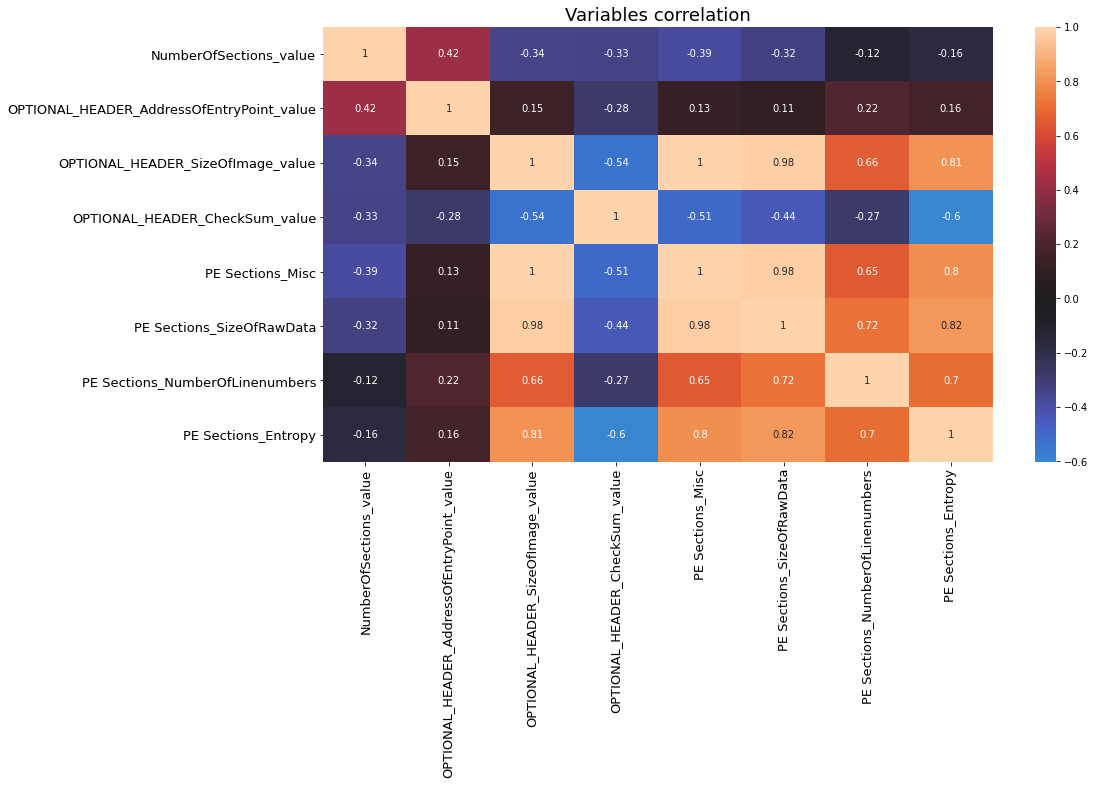

In [69]:
df_corr = dataCopy.corr()
plt.figure(figsize=(15,8))
sns.heatmap(df_corr, center=0, annot=True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Variables correlation', fontsize=18)
plt.show()

Text(0.5, 1.0, 'Features in 2D')

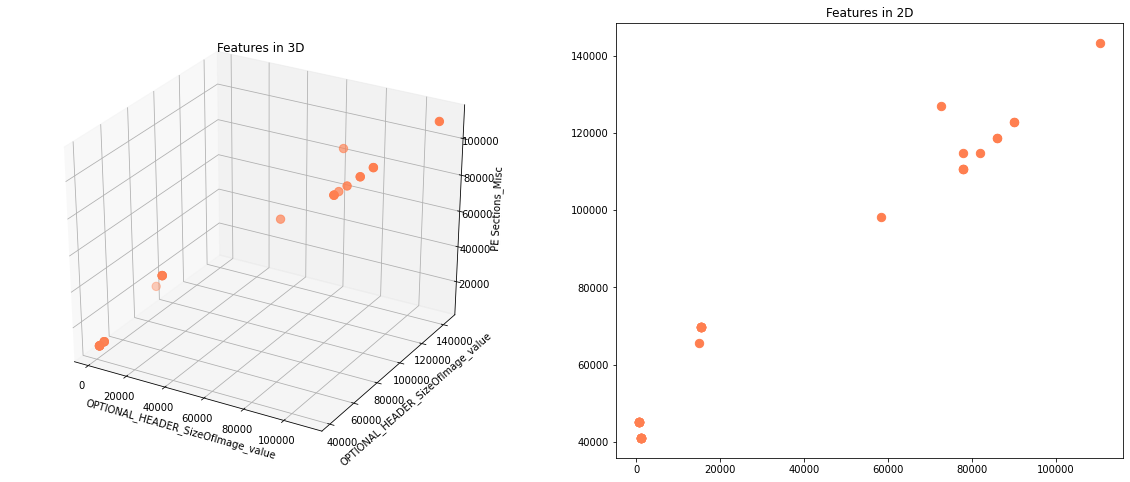

In [70]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(dataCopy.loc[:,'PE Sections_SizeOfRawData'], dataCopy.loc[:,'OPTIONAL_HEADER_SizeOfImage_value'], dataCopy.loc[:,'PE Sections_Misc'], s=70,c='coral')
ax.set_title("Features in 3D")
ax.set_xlabel('OPTIONAL_HEADER_SizeOfImage_value')
ax.set_ylabel('OPTIONAL_HEADER_SizeOfImage_value')
ax.set_zlabel('PE Sections_Misc')



ax = fig.add_subplot(1, 2, 2)
ax.scatter(dataCopy.loc[:,'PE Sections_SizeOfRawData'], dataCopy.loc[:,'OPTIONAL_HEADER_SizeOfImage_value'], s=70,c='coral')
ax.set_title("Features in 2D")



In [0]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [0]:
# clustering = DBSCAN(eps=4, min_samples=2).fit(dataCopy)
# labels = clustering.labels_
# print(labels)
# print('Estimated number of clusters: %d' % n_clusters_)

各個簇的樣本數目：
0    12
3    10
2     9
1     9
dtype: int64


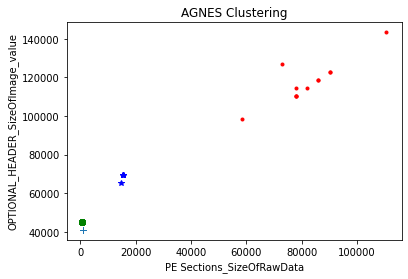

In [73]:
clustering = AgglomerativeClustering(linkage='ward', n_clusters=4)

res = clustering.fit(dataCopy.values)

print ("各個簇的樣本數目：")
print (pd.Series(clustering.labels_).value_counts())


plt.figure()
d0 = dataCopy[clustering.labels_ == 0]
plt.plot(d0.loc[:,'PE Sections_SizeOfRawData'], d0.loc[:,'OPTIONAL_HEADER_SizeOfImage_value'], 'r.')
d1 = dataCopy[clustering.labels_ == 1]
plt.plot(d1.loc[:, 'PE Sections_SizeOfRawData'], d1.loc[:, 'OPTIONAL_HEADER_SizeOfImage_value'], 'go')
d2 = dataCopy[clustering.labels_ == 2]
plt.plot(d2.loc[:, 'PE Sections_SizeOfRawData'], d2.loc[:, 'OPTIONAL_HEADER_SizeOfImage_value'], 'b*')
d3 = dataCopy[clustering.labels_ == 3]
plt.plot(d3.loc[:, 'PE Sections_SizeOfRawData'], d3.loc[:, 'OPTIONAL_HEADER_SizeOfImage_value'], '+')


plt.xlabel("PE Sections_SizeOfRawData")
plt.ylabel("OPTIONAL_HEADER_SizeOfImage_value")
plt.title("AGNES Clustering")
plt.show()

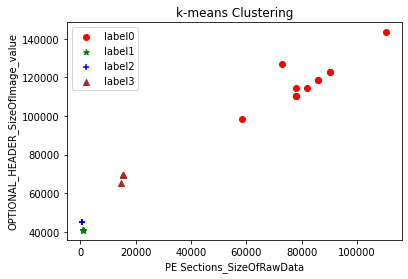

In [74]:
import matplotlib.pyplot as plt  
import numpy as np  
from sklearn.cluster import KMeans
from sklearn import datasets 





estimator = KMeans(n_clusters=4)  # 構造聚類器
estimator.fit(dataCopy.values)  # 聚類
label_pred = estimator.labels_  # 獲取聚類標籤
# 繪製k-means結果
x0 = dataCopy[label_pred == 0]
x1 = dataCopy[label_pred == 1]
x2 = dataCopy[label_pred == 2]
x3 = dataCopy[label_pred == 3]
plt.scatter(x0.loc[:, 'PE Sections_SizeOfRawData'], x0.loc[:, 'OPTIONAL_HEADER_SizeOfImage_value'], c="red", marker='o', label='label0')  
plt.scatter(x1.loc[:, 'PE Sections_SizeOfRawData'], x1.loc[:, 'OPTIONAL_HEADER_SizeOfImage_value'], c="green", marker='*', label='label1')  
plt.scatter(x2.loc[:, 'PE Sections_SizeOfRawData'], x2.loc[:, 'OPTIONAL_HEADER_SizeOfImage_value'], c="blue", marker='+', label='label2')  
plt.scatter(x3.loc[:, 'PE Sections_SizeOfRawData'], x3.loc[:, 'OPTIONAL_HEADER_SizeOfImage_value'], c="brown", marker='^', label='label3')  

plt.xlabel("PE Sections_SizeOfRawData")
plt.ylabel("OPTIONAL_HEADER_SizeOfImage_value")
plt.legend(loc=2)  
plt.title("k-means Clustering")
plt.show()  